In [ ]:
!pip install pydicom
!pip install lime
import pydicom
from skimage.segmentation import mark_boundaries
from skimage.color import gray2rgb
from skimage.util import img_as_ubyte
from lime import lime_image

In [ ]:
# Load and preprocess the DICOM image
dicom_path = '/content/IM-0004-0018.dcm'
dicom = pydicom.dcmread(dicom_path)
image = dicom.pixel_array


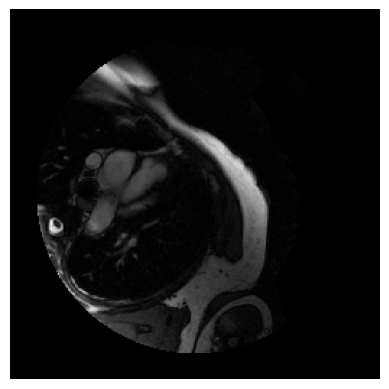

In [ ]:
# Display the DICOM image in grayscale
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Convert image to RGB format for Lime
image_rgb = gray2rgb(image)

In [ ]:
# Create Lime explainer
explainer = lime_image.LimeImageExplainer()

In [ ]:
import numpy as np

# Placeholder for classifier function
def my_classifier_fn(images):
    #images is a numpy array of shape (batch_size, height, width, channels)
    batch_size = images.shape[0]
    num_classes = 2  # Assuming there are two classes for binary classification

    # Generate random predictions for each image in the batch
    predictions = np.random.rand(batch_size, num_classes)

    return predictions

In [ ]:
# Explain the image predictions using Lime
explanation = explainer.explain_instance(image_rgb, classifier_fn=my_classifier_fn)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# Get the segmentations and superimpose them on the image
lime_image, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, hide_rest=False)
segmented_image = mark_boundaries(lime_image, mask)


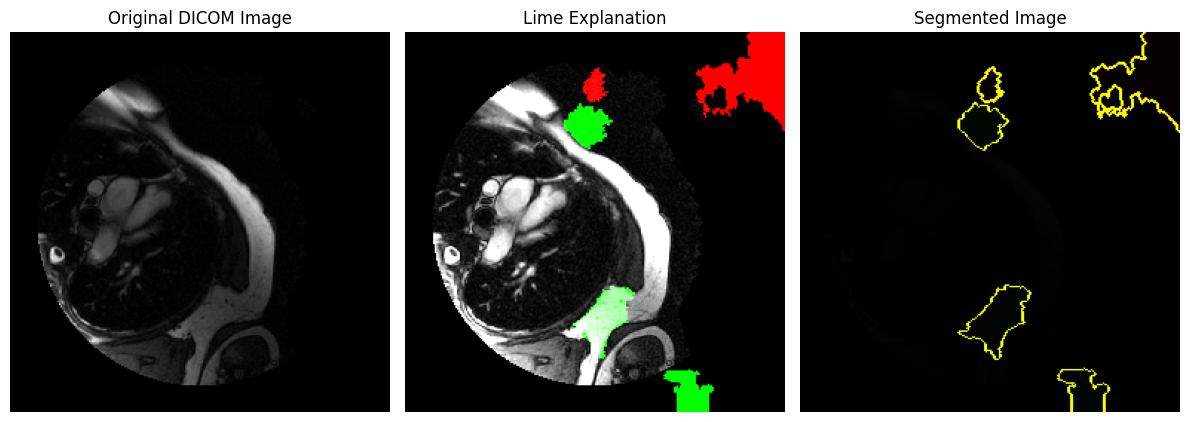

In [ ]:
# Display the original DICOM image, Lime explanation, and segmented image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original DICOM Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(lime_image)
plt.title('Lime Explanation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

plt.tight_layout()
plt.show()